# Import Library

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

In [2]:
df = pd.read_csv('data/data-final-clean.csv')
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
874362,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
874363,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
874364,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


## Reverse Items

The dataset includes questions with reverse items, like EXT2 "I don't talk a lot" in the Extraversion scale. Assigning higher scores to these questions should indicate lower levels of extraversion. Therefore, the reverse items will be encoded accordingly.

In [3]:
# Re-encoding reverse items

reverse_cols = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10', 
                'EST2', 'EST4', 
                'AGR1', 'AGR3', 'AGR5', 'AGR7', 
                'CSN2', 'CSN4', 'CSN6', 'CSN8', 
                'OPN2', 'OPN4', 'OPN6']

for col in reverse_cols:
    df[col] = 6 - df[col].values

In [4]:
# To check whether the reverse items re-coded correctly

df[['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10',
    'EST2', 'EST4', 
    'AGR1', 'AGR3', 'AGR5', 'AGR7', 
    'CSN2', 'CSN4', 'CSN6', 'CSN8', 
    'OPN2', 'OPN4', 'OPN6']].head()

,EXT2,EXT4,EXT6,EXT8,EXT10,EST2,EST4,AGR1,AGR3,AGR5,AGR7,CSN2,CSN4,CSN6,CSN8,OPN2,OPN4,OPN6
0,5.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,5.0
1,1.0,2.0,3.0,1.0,1.0,3.0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,5.0
2,3.0,2.0,4.0,3.0,1.0,2.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,3.0,4.0,5.0,5.0,4.0
3,4.0,3.0,4.0,2.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0
4,3.0,3.0,3.0,1.0,2.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# Preprocessing

In [5]:
# Checking missing value

print('Is there any missing value? ', df.isnull().values.any())
print('How many missing values? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  874366


## Choose 25 of 50 Question

In [6]:
# Looking at the index of the columns

columns = df.columns
for idx, column in enumerate(columns):
    print(f"Column index: {idx}, Column name: {column}")

Column index: 0, Column name: EXT1
Column index: 1, Column name: EXT2
Column index: 2, Column name: EXT3
Column index: 3, Column name: EXT4
Column index: 4, Column name: EXT5
Column index: 5, Column name: EXT6
Column index: 6, Column name: EXT7
Column index: 7, Column name: EXT8
Column index: 8, Column name: EXT9
Column index: 9, Column name: EXT10
Column index: 10, Column name: EST1
Column index: 11, Column name: EST2
Column index: 12, Column name: EST3
Column index: 13, Column name: EST4
Column index: 14, Column name: EST5
Column index: 15, Column name: EST6
Column index: 16, Column name: EST7
Column index: 17, Column name: EST8
Column index: 18, Column name: EST9
Column index: 19, Column name: EST10
Column index: 20, Column name: AGR1
Column index: 21, Column name: AGR2
Column index: 22, Column name: AGR3
Column index: 23, Column name: AGR4
Column index: 24, Column name: AGR5
Column index: 25, Column name: AGR6
Column index: 26, Column name: AGR7
Column index: 27, Column name: AGR8


In [7]:
# Drop the unused questions and country column

df_drop = df.copy()
columns_to_drop = [1, 3, 5, 7, 9, 
                   11, 13, 14, 17, 18,
                   20, 21, 22, 24, 26,
                   31, 32, 33, 35, 37, 
                   41, 42, 43, 45, 46, 50]

df_drop.drop(df_drop.columns[columns_to_drop], axis = 1, inplace = True)
df_drop

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,...,2.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,2.0,4.0
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [8]:
# Function to calculate the sum of specified columns and add the result as a new column in the DataFrame

def sum_columns(dataframe, columns, new_column_name):
    dataframe.loc[:, new_column_name] = dataframe.loc[:, columns].sum(axis=1)
    return dataframe

In [9]:
# Using 'sum_columns' function

val_df = df_drop.copy()

val_df = sum_columns(val_df, val_df.columns[0:5], 'extraversion')
val_df = sum_columns(val_df, val_df.columns[5:10], 'emotional_stability')
val_df = sum_columns(val_df, val_df.columns[10:15], 'agreeableness')
val_df = sum_columns(val_df, val_df.columns[15:20], 'conscientiousness')
val_df = sum_columns(val_df, val_df.columns[21:25], 'openness')

val_df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,OPN1,OPN5,OPN8,OPN9,OPN10,extraversion,emotional_stability,agreeableness,conscientiousness,openness
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,5.0,23.0,11.0,18.0,17.0,16.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,1.0,3.0,2.0,5.0,3.0,12.0,10.0,22.0,17.0,13.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,5.0,4.0,3.0,4.0,4.0,12.0,15.0,19.0,17.0,15.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,4.0,3.0,4.0,3.0,3.0,11.0,13.0,19.0,10.0,13.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,5.0,3.0,5.0,5.0,17.0,10.0,21.0,23.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,...,2.0,4.0,2.0,2.0,4.0,18.0,17.0,21.0,16.0,12.0
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,4.0,5.0,4.0,5.0,4.0,18.0,23.0,20.0,13.0,18.0
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,5.0,4.0,5.0,4.0,5.0,21.0,14.0,18.0,11.0,18.0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,5.0,3.0,5.0,5.0,3.0,10.0,18.0,19.0,18.0,16.0


In [10]:
# Switching columns

val_df.insert(val_df.columns.get_loc('EXT9') + 1, 'extraversion', val_df.pop('extraversion'))
val_df.insert(val_df.columns.get_loc('EST10') + 1, 'emotional_stability', val_df.pop('emotional_stability'))
val_df.insert(val_df.columns.get_loc('AGR10') + 1, 'agreeableness', val_df.pop('agreeableness'))
val_df.insert(val_df.columns.get_loc('CSN10') + 1, 'conscientiousness', val_df.pop('conscientiousness'))
val_df.insert(val_df.columns.get_loc('OPN10') + 1, 'openness', val_df.pop('openness'))

val_df

,EXT1,EXT3,EXT5,EXT7,EXT9,extraversion,EST1,EST3,EST6,EST7,...,CSN7,CSN9,CSN10,conscientiousness,OPN1,OPN5,OPN8,OPN9,OPN10,openness
0,4.0,5.0,5.0,5.0,4.0,23.0,1.0,4.0,2.0,2.0,...,4.0,4.0,4.0,17.0,5.0,4.0,3.0,4.0,5.0,16.0
1,3.0,3.0,3.0,2.0,1.0,12.0,2.0,4.0,1.0,2.0,...,3.0,5.0,3.0,17.0,1.0,3.0,2.0,5.0,3.0,13.0
2,2.0,4.0,3.0,1.0,2.0,12.0,4.0,4.0,2.0,2.0,...,4.0,4.0,2.0,17.0,5.0,4.0,3.0,4.0,4.0,15.0
3,2.0,2.0,4.0,2.0,1.0,11.0,3.0,3.0,2.0,2.0,...,2.0,1.0,4.0,10.0,4.0,3.0,4.0,3.0,3.0,13.0
4,3.0,3.0,5.0,3.0,3.0,17.0,1.0,5.0,1.0,1.0,...,5.0,5.0,5.0,23.0,5.0,5.0,3.0,5.0,5.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,4.0,4.0,3.0,3.0,18.0,4.0,3.0,3.0,4.0,...,4.0,3.0,3.0,16.0,2.0,4.0,2.0,2.0,4.0,12.0
874362,4.0,4.0,3.0,4.0,3.0,18.0,4.0,5.0,5.0,4.0,...,2.0,2.0,3.0,13.0,4.0,5.0,4.0,5.0,4.0,18.0
874363,4.0,4.0,5.0,4.0,4.0,21.0,3.0,4.0,2.0,4.0,...,1.0,1.0,4.0,11.0,5.0,4.0,5.0,4.0,5.0,18.0
874364,2.0,3.0,2.0,1.0,2.0,10.0,4.0,4.0,4.0,2.0,...,4.0,4.0,4.0,18.0,5.0,3.0,5.0,5.0,3.0,16.0


## Validity Testing

Validity testing is the process of evaluating and assessing the quality of research or measurement instruments. It involves examining whether the measures or variables used in a study actually measure what they are intended to measure.

The purpose of validity testing is to ensure that the measurements or variables accurately represent the constructs or concepts they are supposed to represent.

In validity testing using Pearson correlation, a commonly used guideline is to consider a correlation coefficient of 0.5 or higher as an indication of validity.

In [11]:
# mengambil 30 sampel secara random untuk dilakukan pengujian
sampled_df = val_df.head(30)

In [12]:
# extraversion
ext_data = sampled_df.iloc[0:874366, sampled_df.columns.get_loc('EXT1'):sampled_df.columns.get_loc('extraversion')+1]
corr_matrix = ext_data.corr()
corr_matrix

,EXT1,EXT3,EXT5,EXT7,EXT9,extraversion
EXT1,1.000000,0.658840,0.714659,0.584340,0.524479,0.812000
EXT3,0.658840,1.000000,0.619216,0.605990,0.753408,0.865262
EXT5,0.714659,0.619216,1.000000,0.648533,0.504269,0.827409
EXT7,0.584340,0.605990,0.648533,1.000000,0.633591,0.848135
EXT9,0.524479,0.753408,0.504269,0.633591,1.000000,0.825927
extraversion,0.812000,0.865262,0.827409,0.848135,0.825927,1.000000


In [13]:
# emotional_stability
est_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('EST1'):sampled_df.columns.get_loc('emotional_stability')+1]
corr_matrix = est_data.corr()
corr_matrix

,EST1,EST3,EST6,EST7,EST10,emotional_stability
EST1,1.000000,0.495003,0.751813,0.477624,0.520095,0.842405
EST3,0.495003,1.000000,0.510046,0.062718,0.259878,0.575295
EST6,0.751813,0.510046,1.000000,0.575391,0.628305,0.900146
EST7,0.477624,0.062718,0.575391,1.000000,0.684638,0.731917
EST10,0.520095,0.259878,0.628305,0.684638,1.000000,0.811647
emotional_stability,0.842405,0.575295,0.900146,0.731917,0.811647,1.000000


In [14]:
# agreeableness
agr_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('AGR4'):sampled_df.columns.get_loc('agreeableness')+1]
corr_matrix = agr_data.corr()
corr_matrix

,AGR4,AGR6,AGR8,AGR9,AGR10,agreeableness
AGR4,1.000000,0.279289,0.509783,0.502293,0.408148,0.732055
AGR6,0.279289,1.000000,0.402609,0.392626,0.429196,0.660462
AGR8,0.509783,0.402609,1.000000,0.625667,0.496794,0.820388
AGR9,0.502293,0.392626,0.625667,1.000000,0.378665,0.756825
AGR10,0.408148,0.429196,0.496794,0.378665,1.000000,0.748205
agreeableness,0.732055,0.660462,0.820388,0.756825,0.748205,1.000000


In [15]:
# conscientiousness
csn_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('CSN1'):sampled_df.columns.get_loc('conscientiousness')+1]
corr_matrix = csn_data.corr()
corr_matrix

,CSN1,CSN5,CSN7,CSN9,CSN10,conscientiousness
CSN1,1.000000,0.645210,0.460323,0.411873,0.365600,0.765320
CSN5,0.645210,1.000000,0.568268,0.420802,0.396447,0.831782
CSN7,0.460323,0.568268,1.000000,0.402028,0.310460,0.729709
CSN9,0.411873,0.420802,0.402028,1.000000,0.251903,0.715666
CSN10,0.365600,0.396447,0.310460,0.251903,1.000000,0.619184
conscientiousness,0.765320,0.831782,0.729709,0.715666,0.619184,1.000000


In [16]:
# openness
opn_data = sampled_df.iloc[0:30, sampled_df.columns.get_loc('OPN1'):sampled_df.columns.get_loc('openness')+1]
corr_matrix = opn_data.corr()
corr_matrix

,OPN1,OPN5,OPN8,OPN9,OPN10,openness
OPN1,1.000000,0.422809,0.551302,0.252481,0.468060,0.599505
OPN5,0.422809,1.000000,0.304388,0.263127,0.793162,0.787997
OPN8,0.551302,0.304388,1.000000,0.171559,0.247955,0.636066
OPN9,0.252481,0.263127,0.171559,1.000000,0.369438,0.633235
OPN10,0.468060,0.793162,0.247955,0.369438,1.000000,0.818328
openness,0.599505,0.787997,0.636066,0.633235,0.818328,1.000000


## Reliabilty Testing

Reliability testing is a step to assessing the consistency and stability of research or measurement instruments. It focuses on evaluating the degree to which the measures or variables produce consistent results over time and across different conditions. Cronbach's alpha is a commonly used method.

In [17]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [18]:
deleted_columns = ['extraversion', 'emotional_stability', 'agreeableness', 'conscientiousness', 'openness']

rel_df = sampled_df.drop(deleted_columns, axis=1)

In [19]:
alpha = cronbach_alpha(rel_df)
alpha

0.8055223458758972

In [20]:
def determine_reliability(alpha):
    if alpha >= 0.70 and alpha <= 0.90:
        return "High"
    elif alpha >= 0.50 and alpha < 0.70:
        return "Moderate"
    elif alpha < 0.50:
        return "Low"
    else:
        return "Can not be determined"

print("Level of internal consistency reliability:", determine_reliability(alpha))

Level of internal consistency reliability: High


## Grouping Questions

In [21]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT5' : 'I start conversations',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT9' : 'I dont mind being the center of attention'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST3' : 'I worry about things',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR4' : 'I sympathize with others feelings',
                 'AGR6' : 'I have a soft heart',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN5' : 'I get chores done right away',
                 'CSN7' : 'I like order',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN5' : 'I have excellent ideas',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

In [22]:
# Function for grouping question\

def question_grouping(name, data):
    group = [column for column in data if column.startswith(name)]
    return group

In [23]:
# Group names and columns

EXT = question_grouping('EXT', df_drop)
EST = question_grouping('EST', df_drop)
AGR = question_grouping('AGR', df_drop)
CSN = question_grouping('CSN', df_drop)
OPN = question_grouping('OPN', df_drop)

In [24]:
print(EXT)

['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9']


In [25]:
# Defining a function to visualize the questions and answers distribution

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(20,35))
    for i in range(1, 6):
        plt.subplot(6,3,i)
        plt.hist(df[groupname[i-1]], bins=10, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=15)

Q&As Related to Extraversion Personality


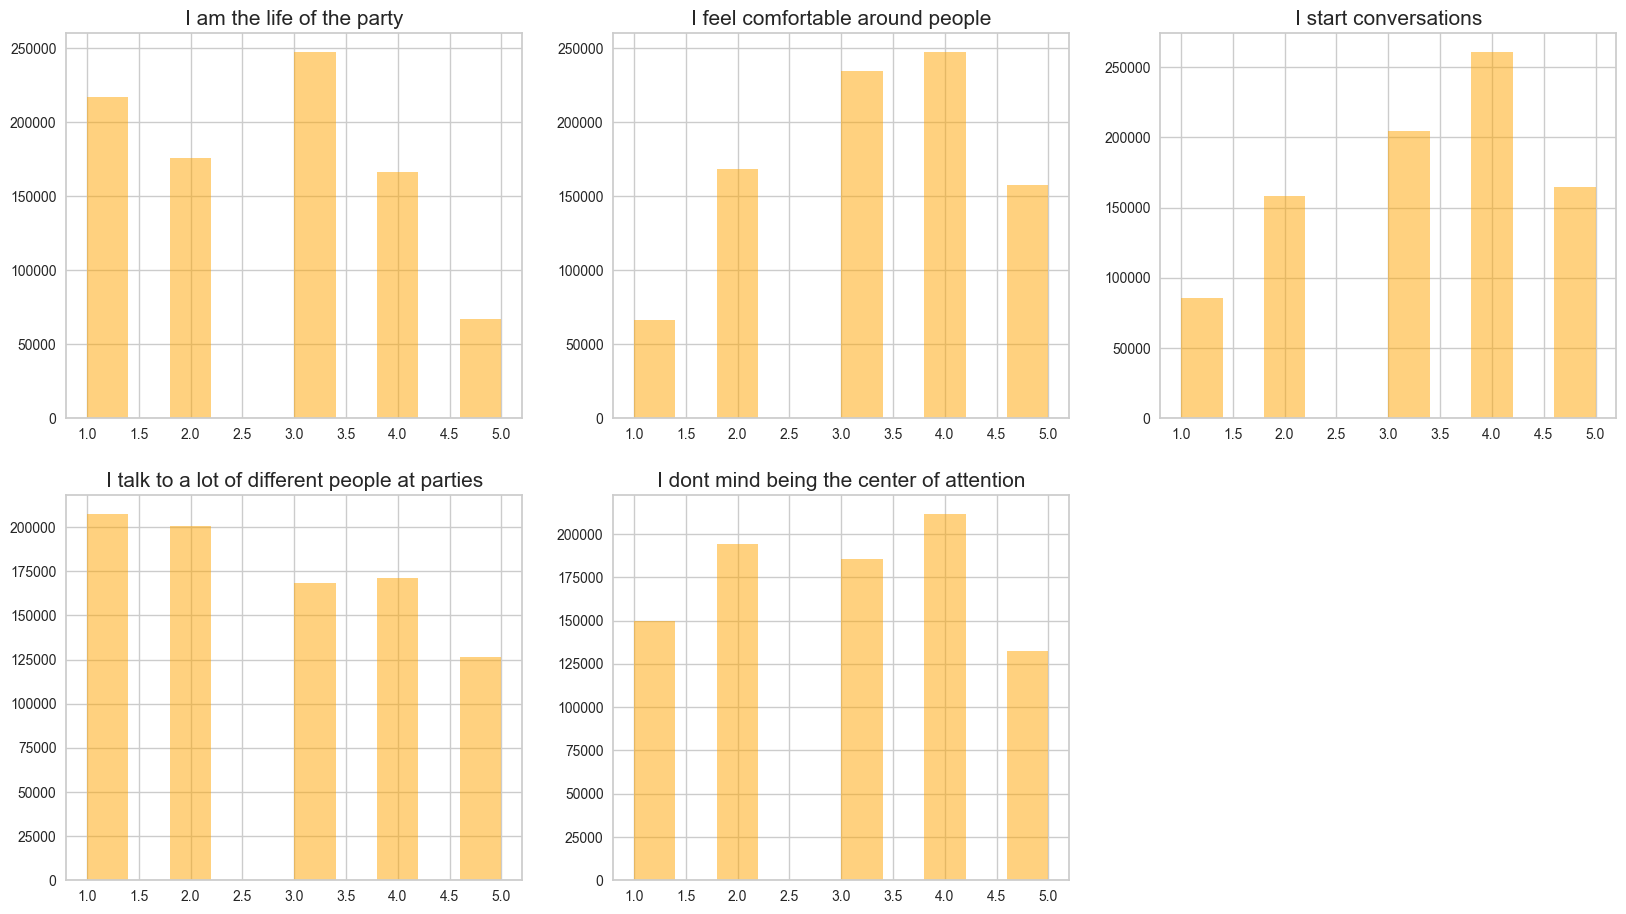

In [26]:
print('Q&As Related to Extraversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism/Emotional Stability Personality


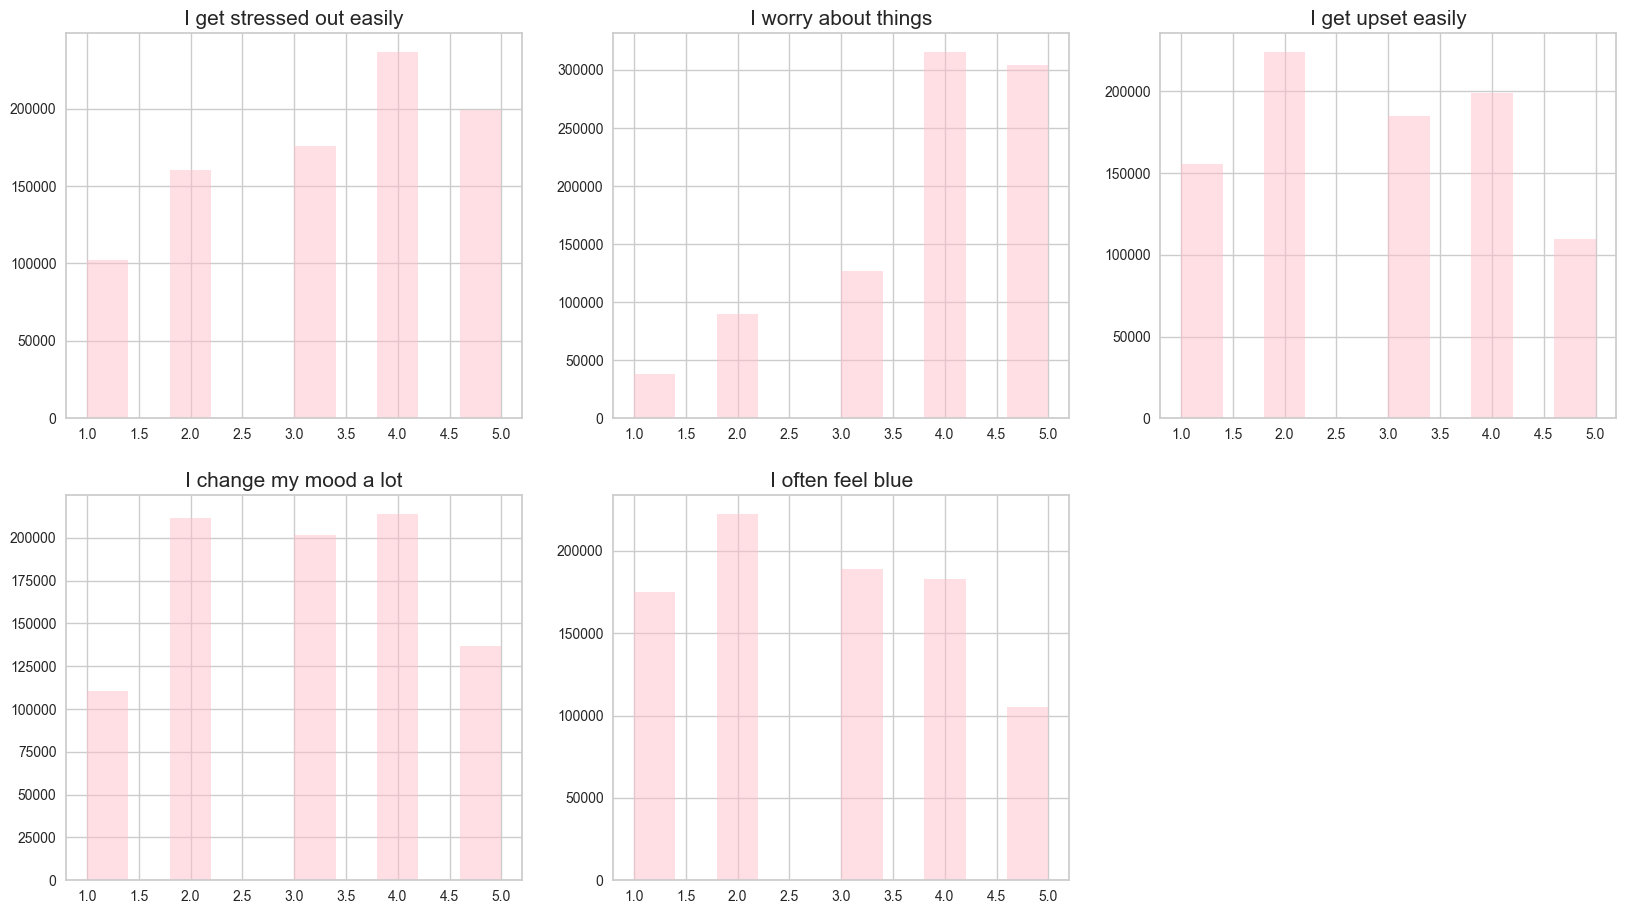

In [27]:
print('Q&As Related to Neuroticism/Emotional Stability Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


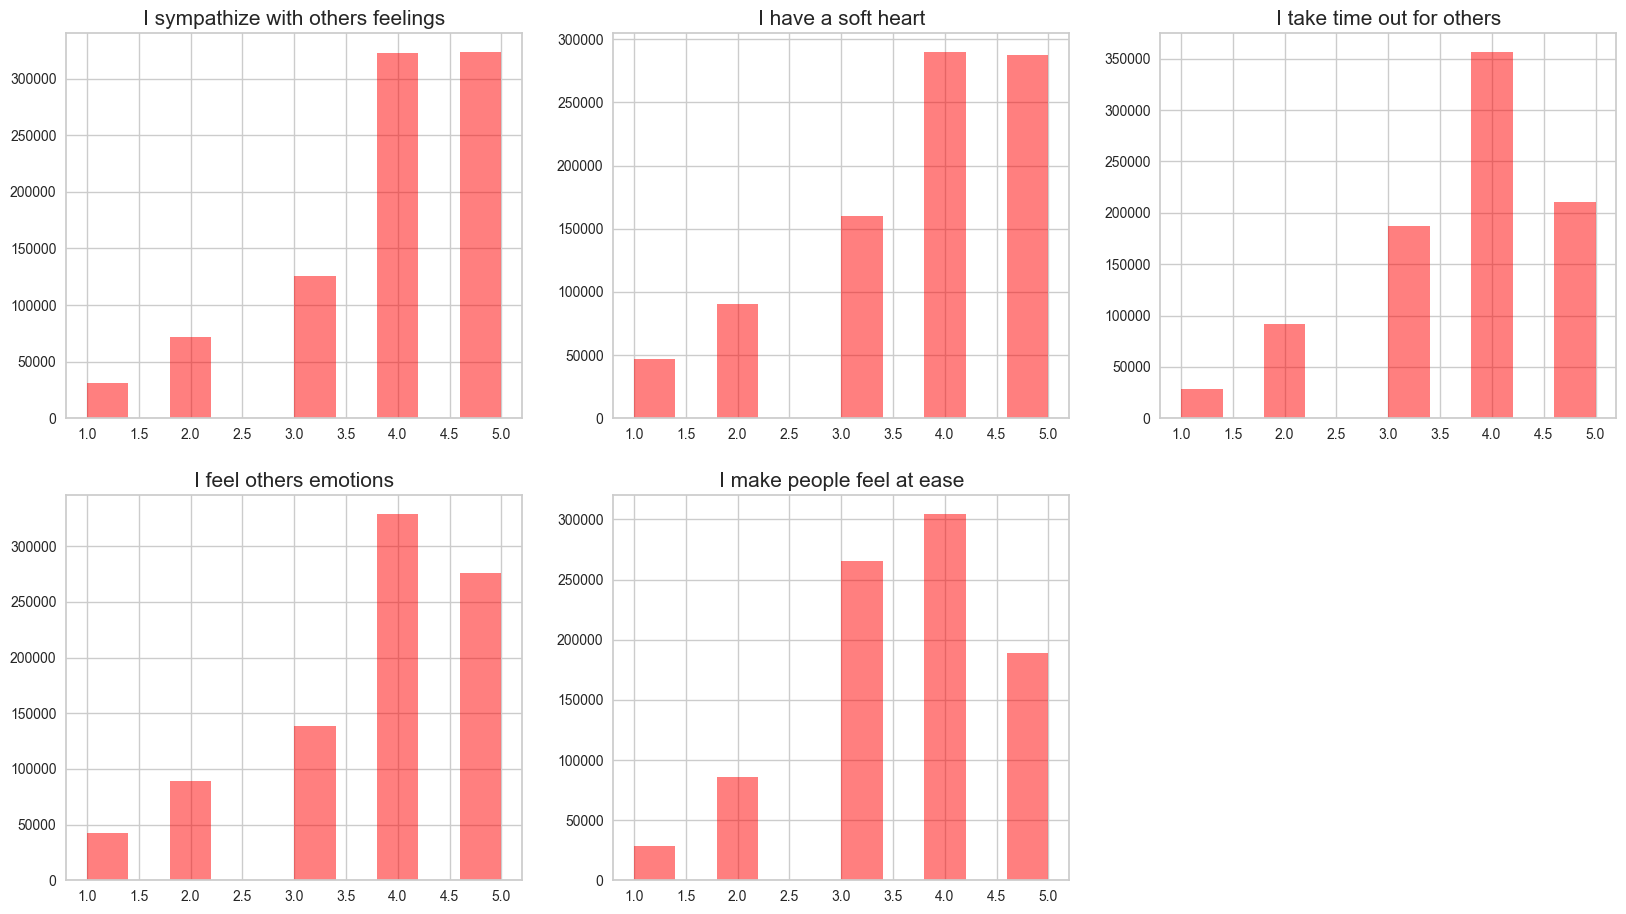

In [28]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


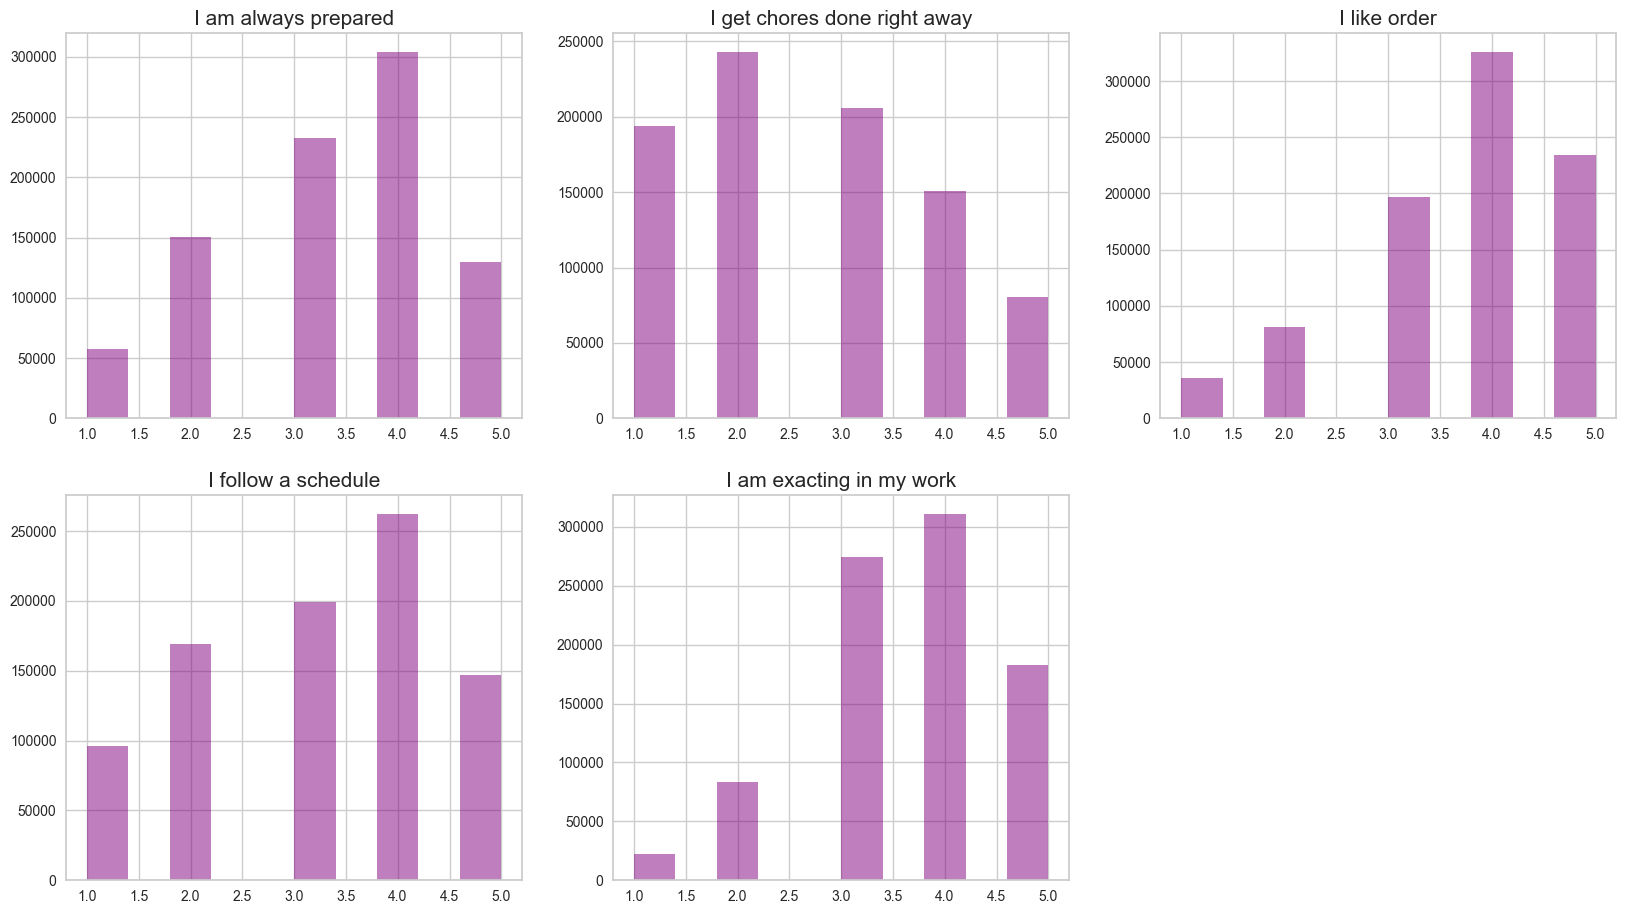

In [29]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


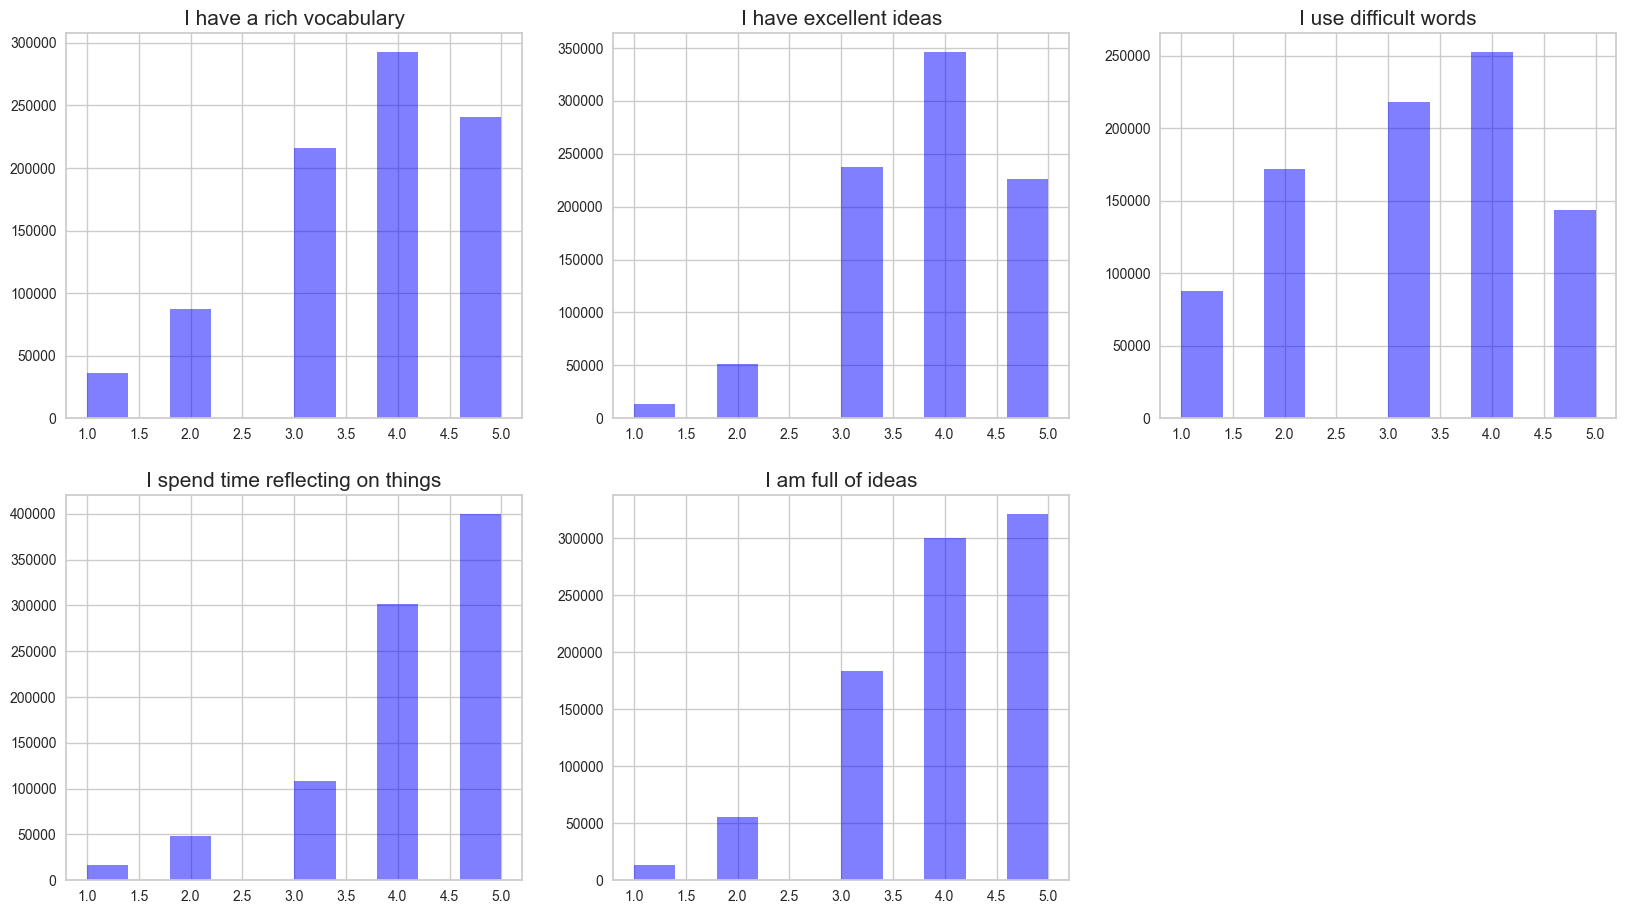

In [30]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

## EDA

### Handle Outliers

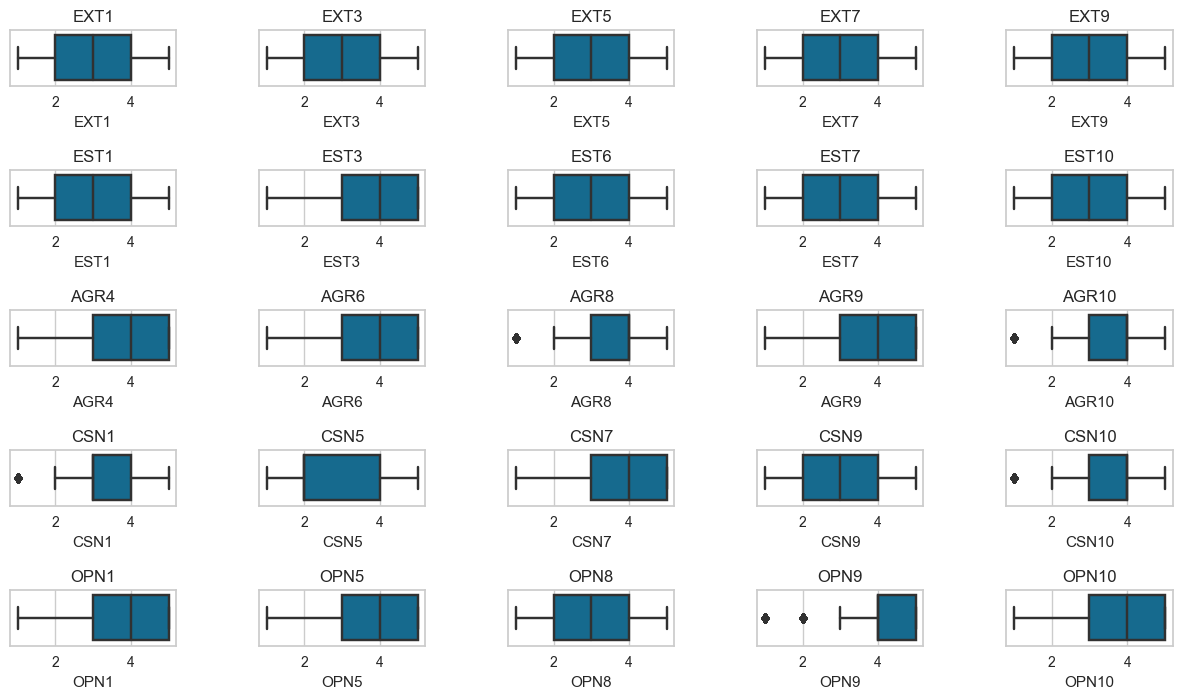

In [31]:
num_plots = 25
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
plt.subplots_adjust(hspace=1.5, wspace=0.5)

plot_index = 0
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < num_plots:
            col = df_drop.columns[plot_index]
            sns.boxplot(x=df_drop[col], ax=axes[i, j])
            axes[i, j].set_title(col)
            plot_index += 1
        else:
            axes[i, j].axis('off')

plt.show()

In [32]:
# Pilih kolom yang ingin dihitung kuartilnya
columns = ['AGR8', 'AGR10', 'CSN1', 'CSN10', 'OPN9']

# Hitung Q1, Q3, dan IQR untuk setiap kolom
Q1 = df_drop[columns].quantile(0.25)
Q3 = df_drop[columns].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers berdasarkan IQR pada kolom-kolom yang dipilih
df_drop[columns] = df_drop[columns][~((df_drop[columns] < (Q1 - 1.5 * IQR)) | (df_drop[columns] > (Q3 + 1.5 * IQR)))]

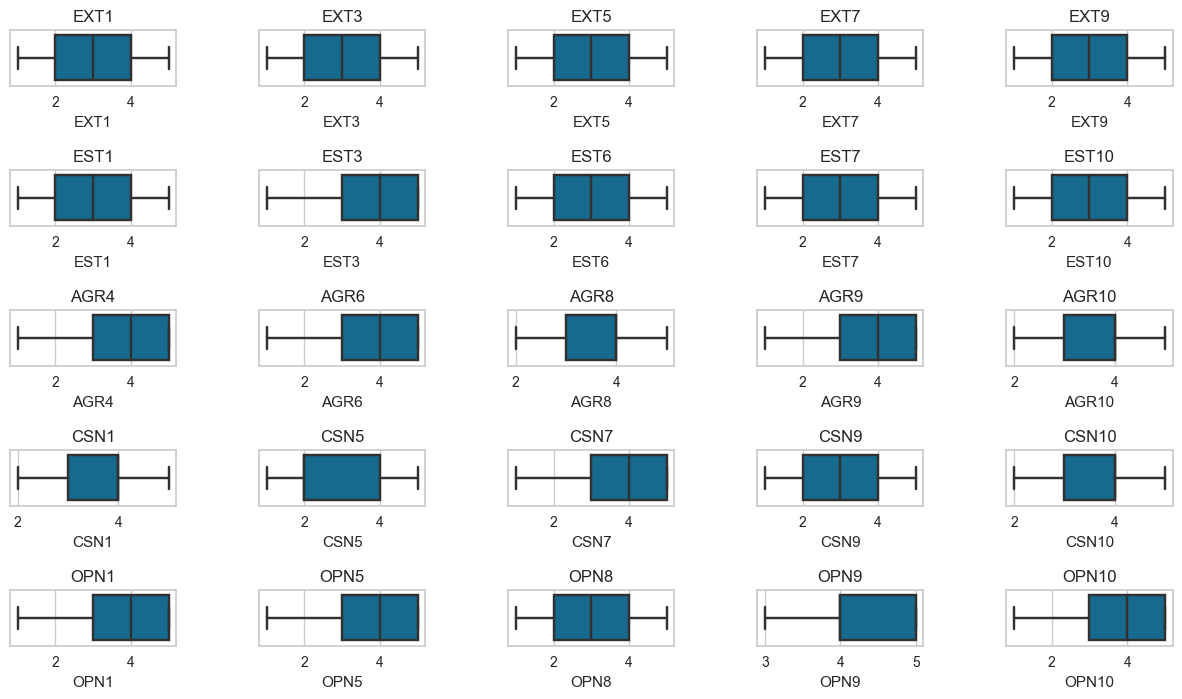

In [33]:
num_plots = 25
num_cols = 5
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
plt.subplots_adjust(hspace=1.5, wspace=0.5)

plot_index = 0
for i in range(num_rows):
    for j in range(num_cols):
        if plot_index < num_plots:
            col = df_drop.columns[plot_index]
            sns.boxplot(x=df_drop[col], ax=axes[i, j])
            axes[i, j].set_title(col)
            plot_index += 1
        else:
            axes[i, j].axis('off')

plt.show()

In [34]:
print('Is there any missing value? ', df_drop.isnull().values.any())
print('How many missing values? ', df_drop.isnull().values.sum())
df_drop.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df_drop))

Is there any missing value?  True
How many missing values?  201381
Number of participants after eliminating missing values:  711963


In [35]:
df_drop

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874360,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,2.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


### Skewness

We need to save origin range (1-5) data for labeling dataset to use in supervised personality classification model. So we need to save df_drop value and for clustering purpose we can use df_clean.

In [36]:
df_clean = df_drop.copy()

In [37]:
# analyzing skewness

skew_list= pd.DataFrame(df_clean.skew())
skew_list.reset_index(inplace = True)
skew_list
skew_list.rename(columns={"index": "Column", 0: "Skew"},inplace=True)

result = []
for i in skew_list["Skew"]:
    if -0.5 < i < 0.5 :
        result.append("symmetrical")
    if -1 < i < -0.5  :
        result.append("positive slightly_skewed")
    if 0.5 < i < 1  :
        result.append("negative slightly_skewed")
    if -1 > i:
        result.append("negative skewed")
    if  1 < i:
        result.append("positive skewed")

skew_list["Result"] = result
skew_label = list(skew_list["Result"].unique())
skew_list_values = list(skew_list["Result"].value_counts())

skew_list

,Column,Skew,Result
0,EXT1,0.126485,symmetrical
1,EXT3,-0.228353,symmetrical
2,EXT5,-0.317821,symmetrical
3,EXT7,0.149512,symmetrical
4,EXT9,-0.025261,symmetrical
5,EST1,-0.285459,symmetrical
6,EST3,-0.887866,positive slightly_skewed
7,EST6,0.116056,symmetrical
8,EST7,-0.004717,symmetrical
9,EST10,0.179533,symmetrical


In [38]:
positive = skew_list[skew_list['Result'].str.contains("positive")]
positive = list(positive["Column"].values)

negative = skew_list[skew_list['Result'].str.contains("negative")]
negative = list(negative["Column"].values)

In [39]:
# handle positive skewness

for i in positive:
  transformed_data, _ = stats.boxcox(df_clean[i])
  df_clean[i] = transformed_data

In [40]:
# handle negative skewness

for i in negative:
  transformed_data, _ = stats.yeojohnson(df_clean[i])
  df_clean[i] = transformed_data

In [41]:
skew_list= pd.DataFrame(df_clean.skew())
skew_list.reset_index(inplace = True)
skew_list
skew_list.rename(columns={"index": "Column", 0: "Skew"},inplace=True)

result = []
for i in skew_list["Skew"]:
    if -0.5 < i < 0.5 :
        result.append("symmetrical")
    if -1 < i < -0.5  :
        result.append("positive slightly_skewed")
    if 0.5 < i < 1  :
        result.append("negative slightly_skewed")
    if -1 > i:
        result.append("negative skewed")
    if  1 < i:
        result.append("positive skewed")

skew_list["Result"] = result
skew_label = list(skew_list["Result"].unique())
skew_list_values = list(skew_list["Result"].value_counts())

skew_list

,Column,Skew,Result
0,EXT1,0.126485,symmetrical
1,EXT3,-0.228353,symmetrical
2,EXT5,-0.317821,symmetrical
3,EXT7,0.149512,symmetrical
4,EXT9,-0.025261,symmetrical
5,EST1,-0.285459,symmetrical
6,EST3,-0.318914,symmetrical
7,EST6,0.116056,symmetrical
8,EST7,-0.004717,symmetrical
9,EST10,0.179533,symmetrical


In [42]:
del skew_list

In [43]:
df_clean

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,7.821648,2.0,2.0,2.0,...,3.0,2.0,6.044484,4.0,4.0,7.876022,4.0,3.0,19.183718,12.751885
1,3.0,3.0,3.0,2.0,1.0,2.0,7.821648,1.0,2.0,1.0,...,3.0,3.0,3.400476,5.0,3.0,0.000000,3.0,2.0,37.083392,4.154958
2,2.0,4.0,3.0,1.0,2.0,4.0,7.821648,2.0,2.0,3.0,...,4.0,3.0,6.044484,4.0,2.0,7.876022,4.0,3.0,19.183718,7.888907
3,2.0,2.0,4.0,2.0,1.0,3.0,4.128300,2.0,2.0,3.0,...,2.0,1.0,1.365626,1.0,4.0,5.282773,3.0,4.0,8.097358,4.154958
4,3.0,3.0,5.0,3.0,3.0,1.0,12.621301,1.0,1.0,2.0,...,5.0,3.0,9.259072,5.0,5.0,7.876022,5.0,3.0,37.083392,12.751885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874360,5.0,5.0,4.0,3.0,5.0,5.0,12.621301,4.0,5.0,4.0,...,2.0,3.0,3.400476,2.0,4.0,5.282773,3.0,3.0,19.183718,7.888907
874362,4.0,4.0,3.0,4.0,3.0,4.0,12.621301,5.0,4.0,5.0,...,3.0,3.0,1.365626,2.0,3.0,5.282773,5.0,4.0,37.083392,7.888907
874363,4.0,4.0,5.0,4.0,4.0,3.0,7.821648,2.0,4.0,1.0,...,4.0,1.0,0.000000,1.0,4.0,7.876022,4.0,5.0,19.183718,12.751885
874364,2.0,3.0,2.0,1.0,2.0,4.0,7.821648,4.0,2.0,4.0,...,4.0,2.0,6.044484,4.0,4.0,7.876022,3.0,5.0,37.083392,4.154958


### Normalization
Scale Feature Into Range 0-1

In [44]:
minMax = MinMaxScaler()
for col in df_clean.columns:
    df_clean[col] = minMax.fit_transform(df_clean[[col]])
df_clean.head()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,0.75,1.00,1.00,1.00,0.75,0.00,0.619718,0.25,0.25,0.25,...,0.333333,0.25,0.652817,0.75,0.666667,1.000000,0.75,0.50,0.382472,1.000000
1,0.50,0.50,0.50,0.25,0.00,0.25,0.619718,0.00,0.25,0.00,...,0.333333,0.50,0.367259,1.00,0.333333,0.000000,0.50,0.25,1.000000,0.325831
2,0.25,0.75,0.50,0.00,0.25,0.75,0.619718,0.25,0.25,0.50,...,0.666667,0.50,0.652817,0.75,0.000000,1.000000,0.75,0.50,0.382472,0.618646
3,0.25,0.25,0.75,0.25,0.00,0.50,0.327090,0.25,0.25,0.50,...,0.000000,0.00,0.147491,0.00,0.666667,0.670741,0.50,0.75,0.000000,0.325831
4,0.50,0.50,1.00,0.50,0.50,0.00,1.000000,0.00,0.00,0.25,...,1.000000,0.50,1.000000,1.00,1.000000,1.000000,1.00,0.50,1.000000,1.000000


### Standardization

In [45]:
ss = StandardScaler()
for col in df_clean.columns:
    df_clean[col] = ss.fit_transform(df_clean[[col]])
df_clean.head()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,1.083475,1.441427,1.381182,1.609786,0.779221,-1.790225,-0.044687,-0.666663,-0.832858,-0.605839,...,-0.537616,-0.589609,0.102880,0.563928,0.307232,1.289706,0.161451,-0.213042,-0.641225,1.144143
1,0.265534,-0.314061,-0.295724,-0.609301,-1.543520,-1.014063,-0.044687,-1.458241,-0.832858,-1.394410,...,-0.537616,0.229522,-0.891503,1.409887,-0.813932,-2.130402,-0.972372,-1.057072,0.991884,-1.151436
2,-0.552408,0.563683,-0.295724,-1.348997,-0.769273,0.538261,-0.044687,-0.666663,-0.832858,0.182732,...,0.508055,0.229522,0.102880,0.563928,-1.935097,1.289706,0.161451,-0.213042,-0.641225,-0.154385
3,-0.552408,-1.191806,0.542729,-0.609301,-1.543520,-0.237901,-0.971663,-0.666663,-0.832858,0.182732,...,-1.583288,-1.408740,-1.656789,-1.973950,0.307232,0.163606,-0.972372,0.630988,-1.652709,-1.151436
4,0.265534,-0.314061,1.381182,0.130395,0.004974,-1.790225,1.159955,-1.458241,-1.641338,-0.605839,...,1.553727,0.229522,1.311853,1.409887,1.428397,1.289706,1.295274,-0.213042,0.991884,1.144143


## Reducing Dimensionality Using PCA

In [46]:
# Apply PCA for dimensionality reduction

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_clean)

# Prediction

## K-Elbow Visualization

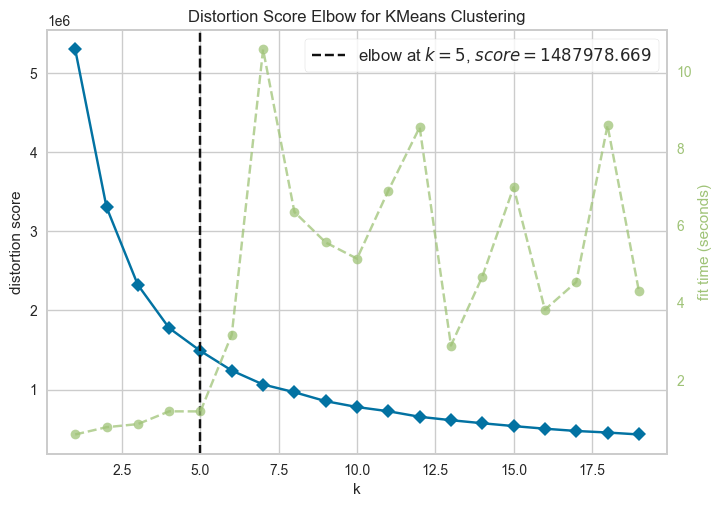

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
reduced_data_copy = reduced_data.copy()

kmeans = KMeans(n_init='auto')
visualizer = KElbowVisualizer(kmeans, k=(1, 20))
visualizer.fit(reduced_data_copy)
visualizer.poof()

## Create Model Using 5 Cluster

In [53]:
# Apply clustering algorithm (e.g., K-means) to the reduced data
kmeans = KMeans(n_clusters=5, n_init='auto')
k_5_fit = kmeans.fit(reduced_data)

In [54]:
df_result = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
df_result['Clusters'] = k_5_fit.labels_
df_result

,PCA1,PCA2,Clusters
0,-2.894370,1.819949,2
1,0.189635,0.157026,0
2,0.808715,0.630935,0
3,1.780109,1.885633,1
4,-2.921973,-0.074805,2
...,...,...,...
711958,-0.196809,-1.457746,4
711959,0.682048,-2.019335,3
711960,-1.788029,1.687239,0
711961,1.977255,-0.378408,3


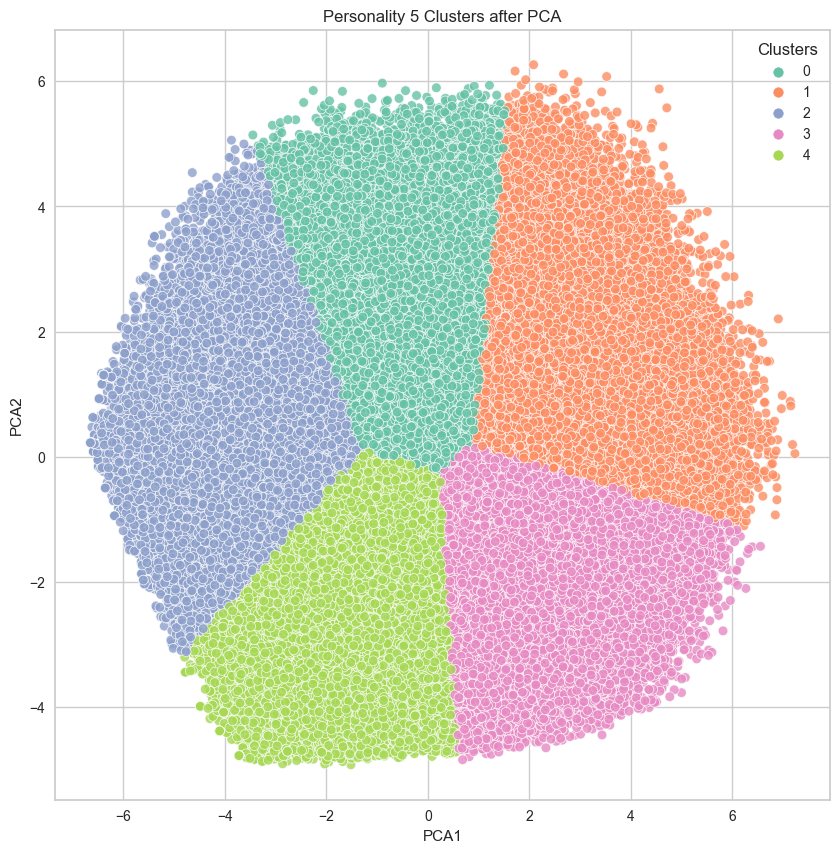

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_result, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality 5 Clusters after PCA');

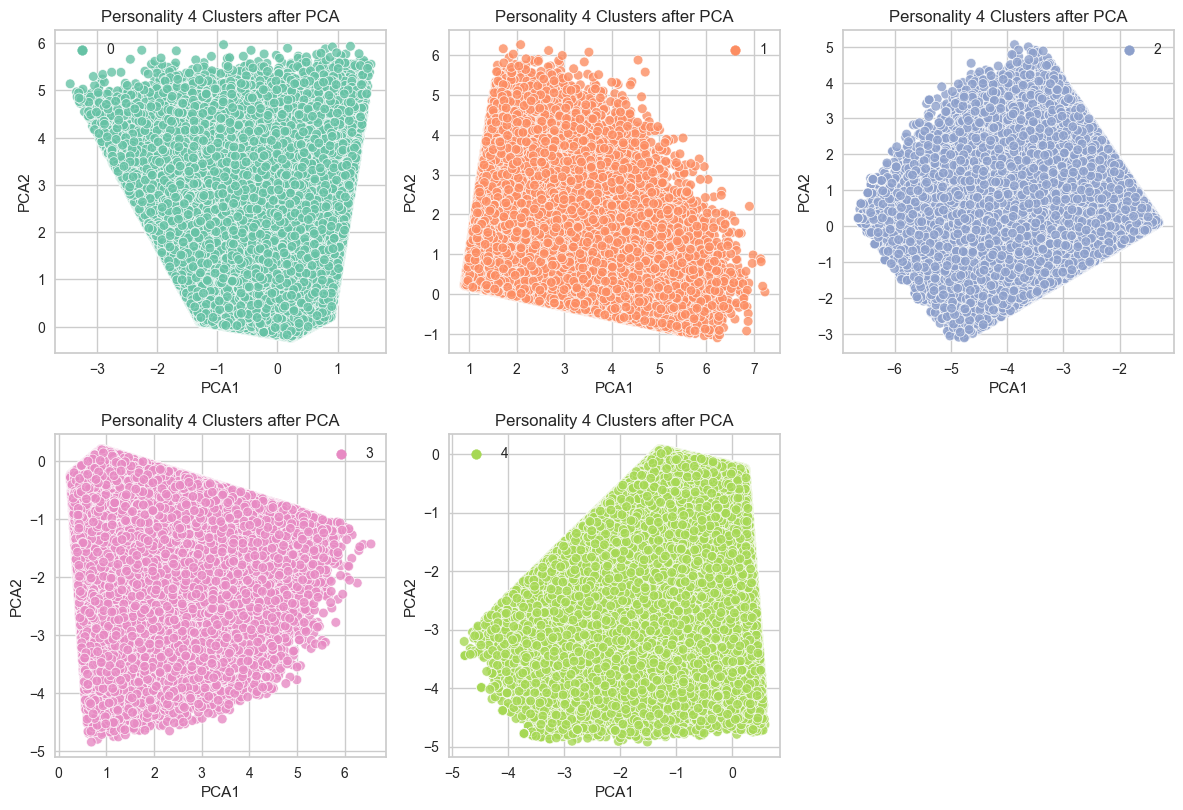

In [56]:
plt.figure(figsize=(12,24))
colors = sns.color_palette('Set2', 5)

for label in range(5):
    cluster_points = df_result[df_result['Clusters'] == label]
    
    plt.subplot(6,3,label+1)
    sns.scatterplot(data=cluster_points, x='PCA1', y='PCA2', hue='Clusters', palette=[colors[label]], alpha=0.8)
    plt.legend(loc='best')
    plt.title('Personality 4 Clusters after PCA');
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [57]:
df_result.Clusters.value_counts()

Clusters
0    177582
4    156151
3    151818
1    118556
2    107856
Name: count, dtype: int64

## Saved Datasets with Label

In [58]:
df_drop['labels'] = k_5_fit.labels_
df_drop

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,2
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0,0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0,0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,1
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874360,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,4
874362,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,3
874363,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,0
874364,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0,3


In [59]:
filepath = 'data/personality-with-label.csv'
df_drop.to_csv(filepath, index=False)